# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [411]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [433]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf
from scipy.special import comb
import seaborn as sns

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

###### **ANSWER** 

One example of a real life network would be the social network where the node is an individual person and the link is a friend. Another real life example is the neuroscience and the mapping of the brain where the node is a neuron and the links are the interactions between neurons. Lastly a communication network e.g. corporation emails, where a node would be an email address and the link is the data sent between each individual exchanging information.  

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

###### **ANSWER** 

Networks like the social network and different types of transportational networks are interesting because they contain data that could be used to describe behaviour. E.g Uber data where nodes are the end destination and links would be people transported. This data can be mappet out pretty interestingly analysing traffic flow as well as price sensitivity due to surge prices in the uber model. 

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

###### **ANSWER** 

I think the biggest impact in the next decade would be to understand the molecular network by accurately mapping cellular functions and how genes, proteins, metabolites and other cellular components interact with each other. This is important for global health and prevention of e.g. pandemics. Understanding the molecular network creates opportunities for developing vaccines and drugs that can cure diseases without major side-effects. 

A good example is the current situation where one disease is creating global crisis.


> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

###### **ANSWER** 

Small socities like an network on an island, or a religous community. Here I rekon the network nodes would have many connections as the community tends to be grouped.


### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

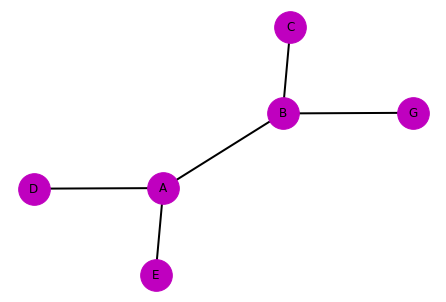

In [413]:
# creating graph
G = nx.Graph()

# adding nodes and edges 
G.add_nodes_from(['A', 'B', 'C', 'D', 'E','F','G'])


G.add_edges_from([('B', 'C'), ('B', 'A'),('A', 'D'),('E', 'A'),('B','F'),('B','G')])


#removning node
G.remove_node('F')

#plotting graph
options = {'node_color': 'm','node_size': 1000,'width': 2}
nx.draw(G, with_labels = True, **options)



> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

###### **ANSWER** 

The ER network is a method to display a fictional graph where a random graph is constructed by fixing n and then independently for each pair of node forms a connections between nodes with probability p.
The ER is created by  ER = nx.gno_random_graph(n=x, p=z), where z is < 1. 

It is thus a theoretical graph you can use to compare to the empirical graph. 

Text(0, 0.5, 'p (d)')

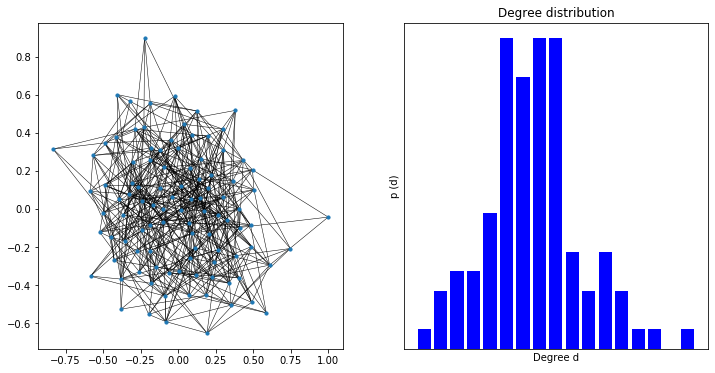

In [414]:
#generating an ER network with N = 100 and p = 0.1
ER = nx.gnp_random_graph(n = 100, p = 0.1)

def compute_degree_distribution(network,p):
    N = network.number_of_nodes()
    degrees = sorted([d for n, d in network.degree()])
    counts = Counter(degrees)
    degrees, counts = zip(*counts.items())
    empirical_probs = [c/N for c in counts]
    theoretical_probs = [comb(N - 1, k) * (p**k) * (1-p)**(N-1-k) for k in degrees]
    return degrees, empirical_probs, theoretical_probs

degr, probs, ther = compute_degree_distribution(ER, 0.1)

fig, ax = plt.subplots(1,2, figsize = (12,6))
pos = nx.spring_layout(ER)
nx.draw_networkx_nodes(ER, pos, node_size = 10, with_labels = False, ax = ax[0])
nx.draw_networkx_edges(ER, pos, alpha = 1, width = 0.5, ax = ax[0] )
#Probability Distribution plot

plt.bar(degr, probs, width=0.80, color='b')
plt.title('Degree distribution')
plt.xlabel('Degree d')
plt.ylabel('p (d)')


> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

###### **ANSWER** 

The BA network is a model trying to explain how real-world models work. Since the nodes are scarse this network model is generative as it adds in nodes to a small starting network. It is created by nx.barabasi_albert_graph followed by a modified degree distribution.

Text(0, 0.5, 'p (d)')

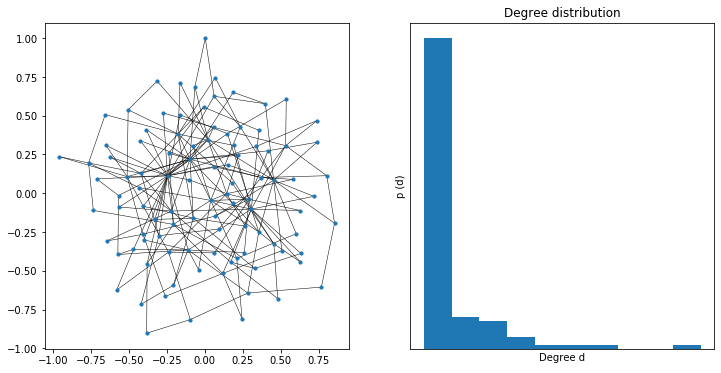

In [415]:
# generating BA network
BA = nx.barabasi_albert_graph(n = 100, m = 2)

# plotting network 

def compute_degree_distributionBA(network,m):
    N = network.number_of_nodes()
    BAdegrees = sorted([d for n, d in network.degree()])
    BAcounts = Counter(degrees)
    BAdegrees, BAcounts = zip(*BAcounts.items())
    BAempirical_probs = [c/N for c in BAcounts]
    BAtheoretical_probs = [(2*m*(m+1))%(k*(k+1)*(k+2)) for k in BAdegrees]
    return BAdegrees, BAempirical_probs, BAtheoretical_probs

BAdegr, BAprobs, BAther = compute_degree_distributionBA(BA, 2)

fig, ax = plt.subplots(1,2, figsize = (12,6))
pos = nx.spring_layout(BA)
nx.draw_networkx_nodes(BA, pos, node_size = 10, with_labels = False, ax = ax[0])
nx.draw_networkx_edges(BA, pos, alpha = 1, width = 0.5, ax = ax[0] )
#Probability Distribution plot

degree_list = list(dict(BA.degree).values())
plt.hist(degree_list)
plt.title('Degree distribution')
plt.xlabel('Degree d')
plt.ylabel('p (d)')


### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [443]:
data = pd.read_csv(
    "facebook-wall.txt.csv",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)


,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [444]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [457]:
def create_slice(t0_new, t1_new, data):
    t0 = data.timestamp.max() - 86400 * t0_new  # Lower bound of time-slice (t0_in days before last wall post)
    t1 = data.timestamp.max() - 86400 * t1_new   # Upper bound of time-slice (t1_in days before last wall post)

    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

# Posts last 365 days
G = create_slice(365,0,data)
print('Nodes in network:', G.number_of_nodes())
print('Edges in network:', G.number_of_edges())

Nodes in network: 44397
Edges in network: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

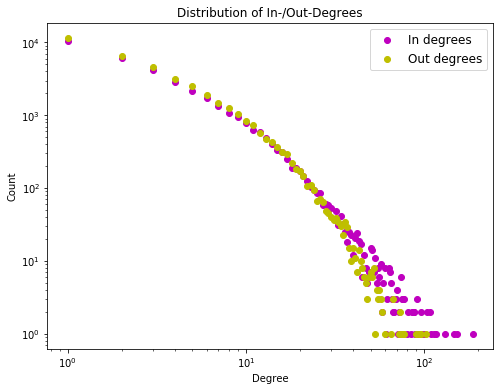

In [419]:
N = G.number_of_nodes() # number of nodes in network
#In-degrees
degrees_in_list = [k for n,k in G.in_degree()]

#Deleting irrelevant 
degrees_in = [degree for degree in degrees_in_list if degree != 0]
deg_in_count = Counter(degrees_in)
deg_in, count_in = zip(*deg_in_count.items())
prob_in_k = [counted/N for counted in count_in] # probablity of k degrees

#Out-degrees
degrees_out_list = [k for n,k in G.out_degree()]

#Deleting irrelevant nodes
degrees_out = [degree for degree in degrees_out_list if degree != 0]
degrees_out_count = Counter(degrees_out)
deg_out, count_out = zip(*degrees_out_count.items())
prob_out_k = [counted/N for counted in count_out] # probablity of k degrees                       

#Plot
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xlabel("Degree")
ax.set_title("Distribution of In-/Out-Degrees")
ax.set_ylabel("Count")
plt.scatter(deg_in, count_in, color = 'm', label = 'In degrees')
plt.scatter(deg_out, count_out, color = 'y', label = 'Out degrees')
plt.yscale("log")
plt.xscale('log')
ax.legend(fontsize = 'large')
plt.show()

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

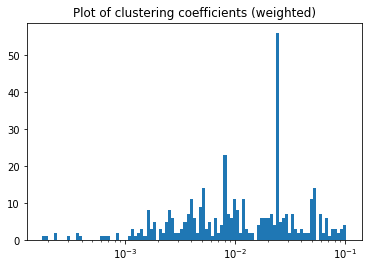

In [447]:
G = list(nx.clustering(G_t, weight ='weight').values())
G = list(filter(lambda num: num != 0, G))
low = min(G)
high = max(G)

# Histogram
plt.hist(G, bins=np.logspace(np.log10(low),np.log10(high), 100))
plt.title("Plot of clustering coefficients (weighted)")
plt.gca().set_xscale("log")
plt.show()

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [469]:
# Kan ikke få koden til at virke.. 
import netwulf as nw

data_sliced = data[:20000]


# Create the `nx.DiGraph`
G_v = create_slice(t0_new = 365, t1_new= 0, data = data_sliced)

# Having a look at nodes and edges
print("Nodes: %d & Edges: %d" %(len(G_v.nodes), len(G_v.edges)))  
# Visualize
nw.visualize(G_v)

Nodes: 5203 & Edges: 9718


(None, None)

I keep getting up a new localhost window claiming it cant visualize the graph due to "Dataset does not have a key 'nodes'". Honestly tried everything.. So I ended up just putting ing the data myself. Not sure if it is even the correct one.. 


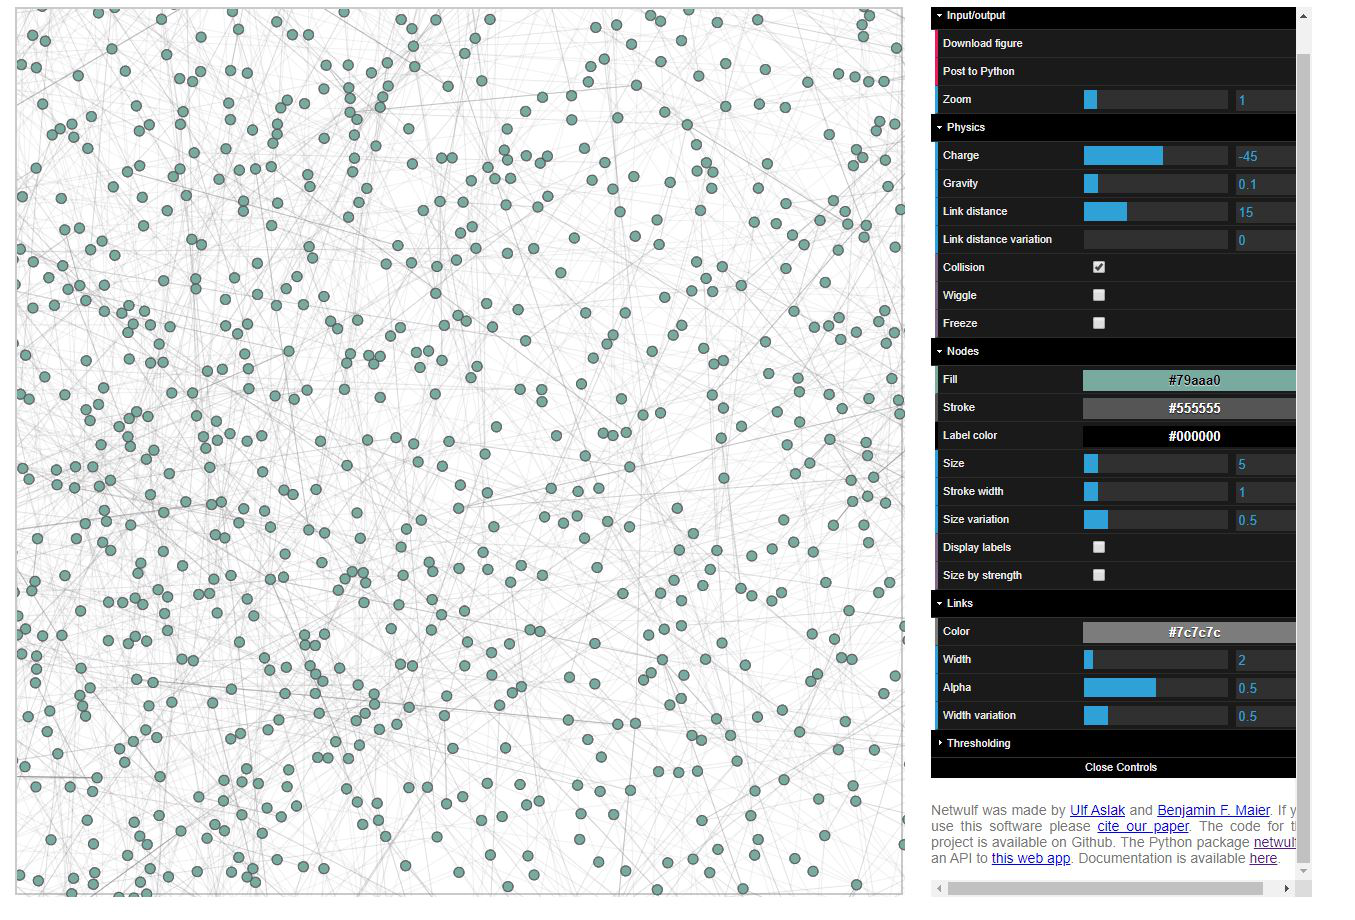

In [472]:
from PIL import Image
Image.open("nw.JPG")